In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2025-07-19 15:51:26.200564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752940286.222890    1621 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752940286.229770    1621 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


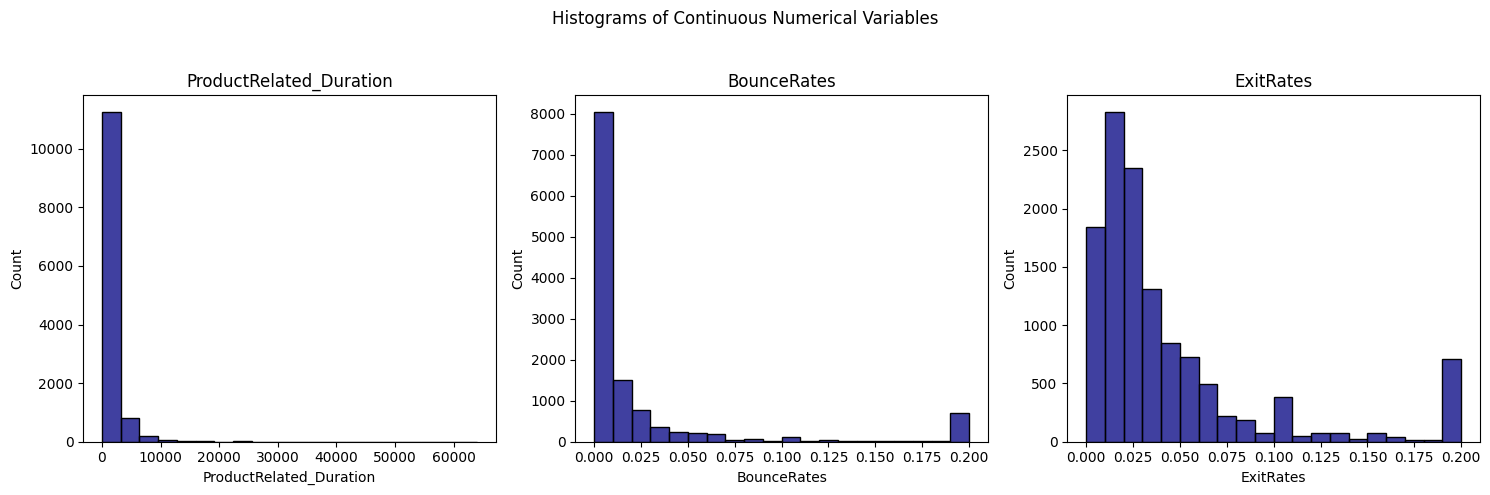

In [8]:
numerical_cols = ['ProductRelated_Duration', 'BounceRates', 'ExitRates']  
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle('Histograms of Continuous Numerical Variables')
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, bins=20, ax=axes[i],color="navy")
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

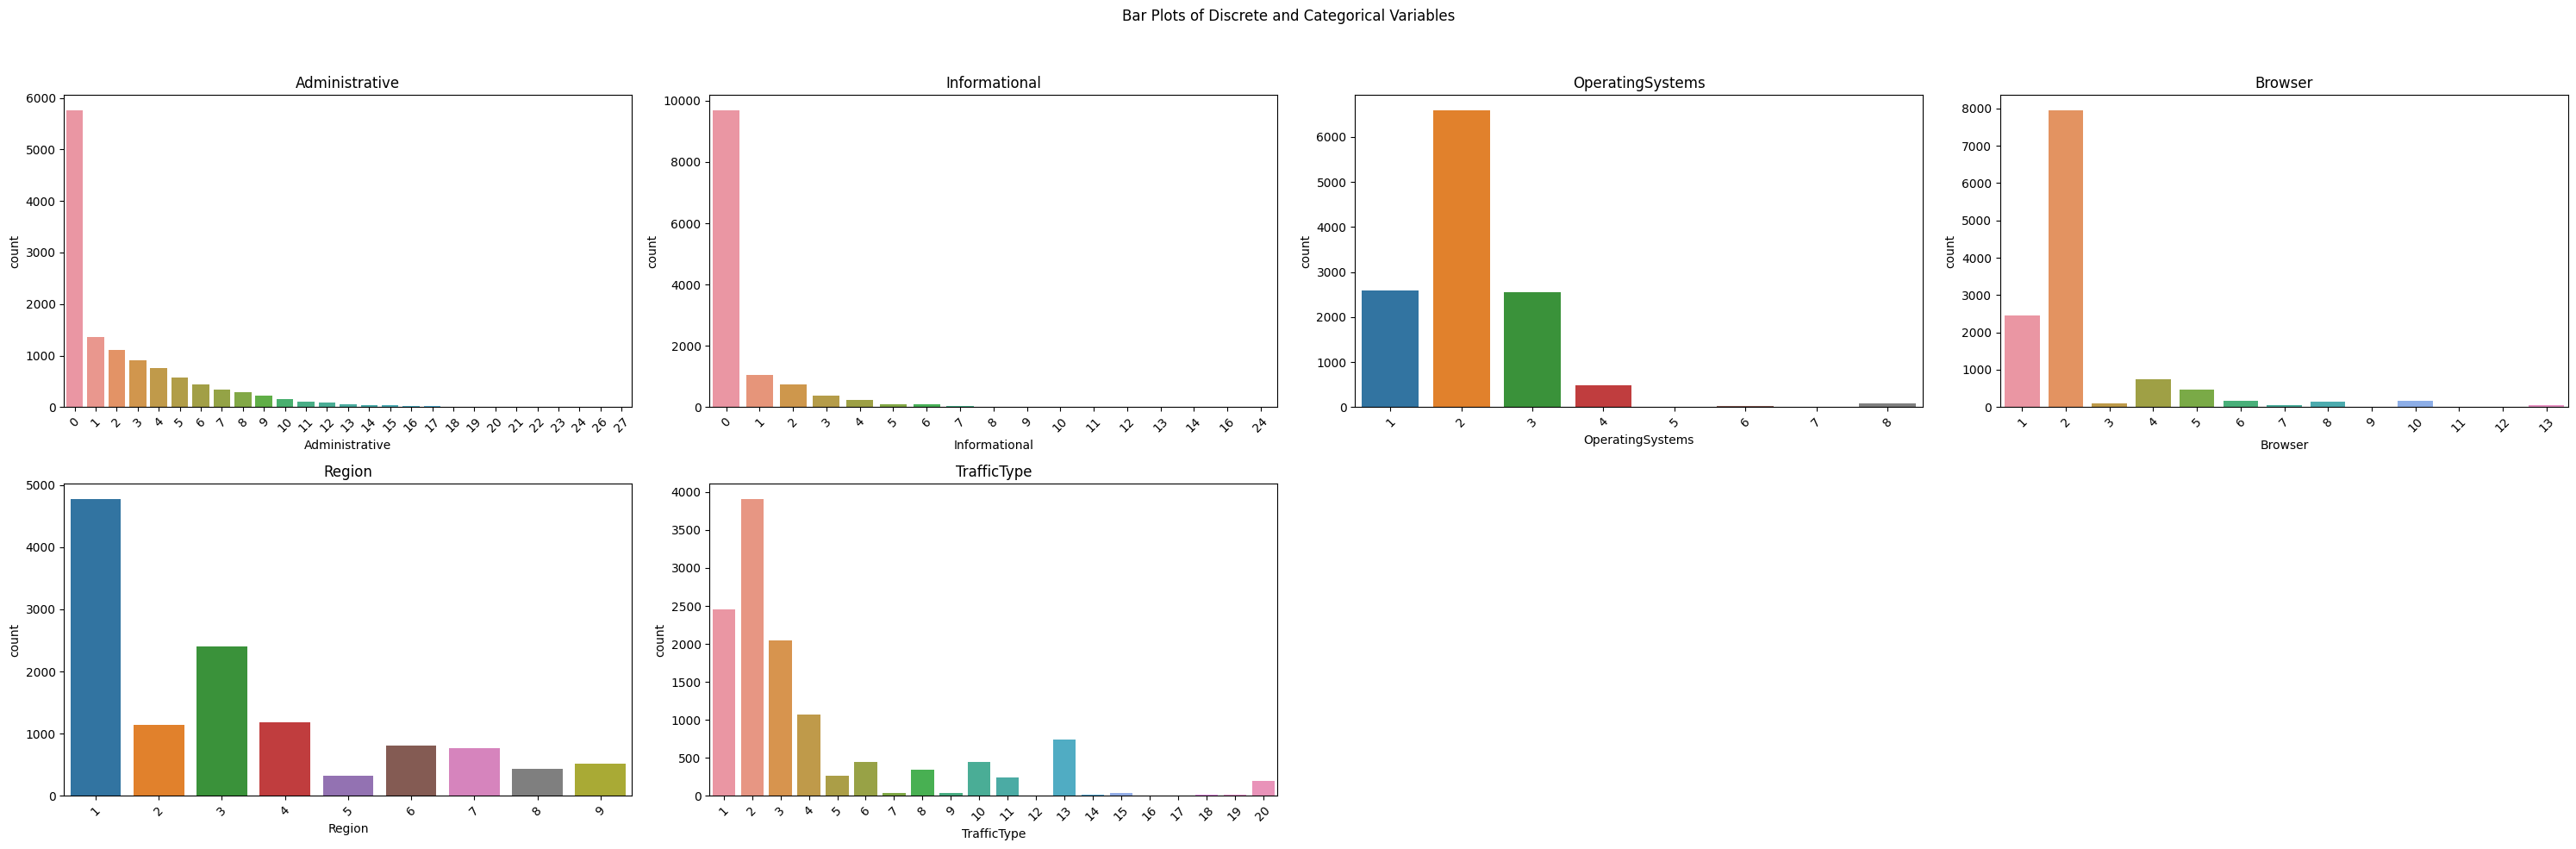

In [9]:
discrete_cols = ['Administrative', 'Informational']
categorical_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
fig, axes = plt.subplots(2, 4, figsize=(30, 10))
fig.suptitle('Bar Plots of Discrete and Categorical Variables')
axes = axes.flatten()
for i, col in enumerate(discrete_cols + categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
# Hide empty subplots (if any)
for i in range(len(discrete_cols + categorical_cols), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

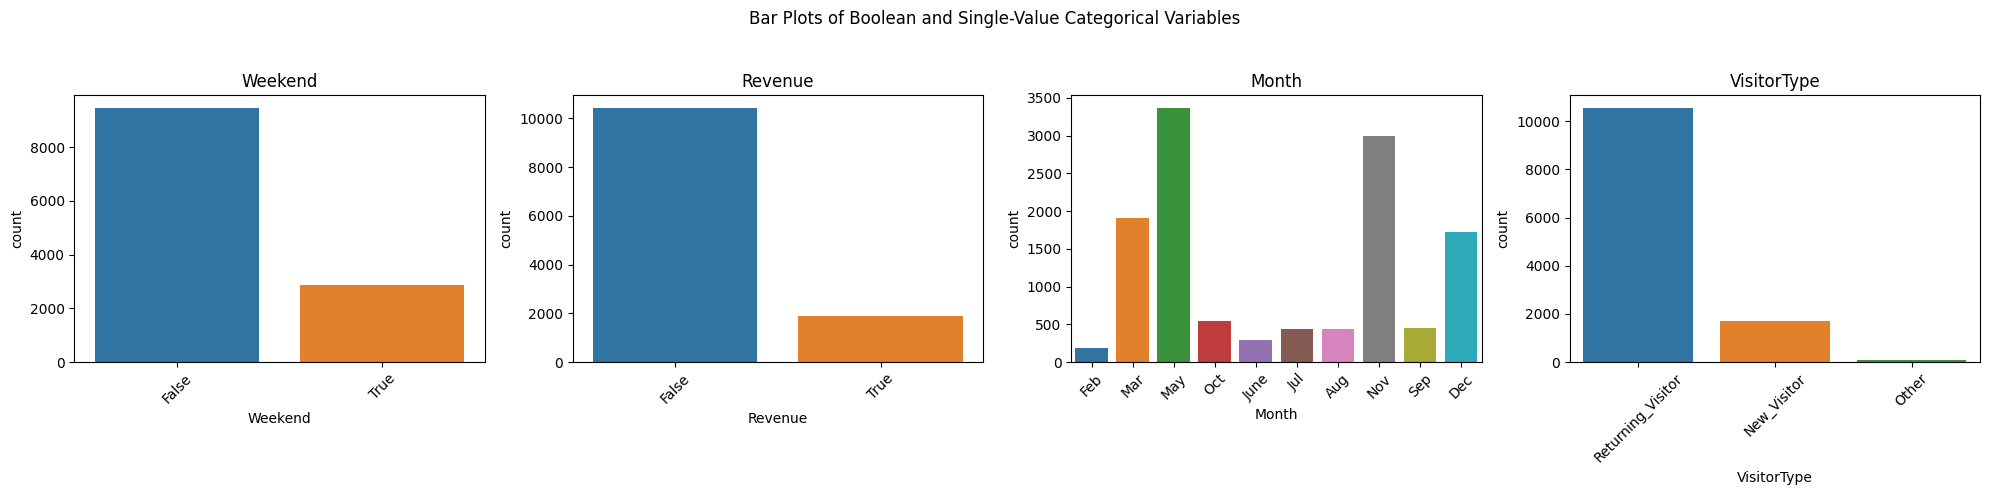

In [10]:
boolean_cols = ['Weekend', 'Revenue']
single_value_cols = ['Month', 'VisitorType']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Bar Plots of Boolean and Single-Value Categorical Variables')
axes = axes.flatten()
for i, col in enumerate(boolean_cols + single_value_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

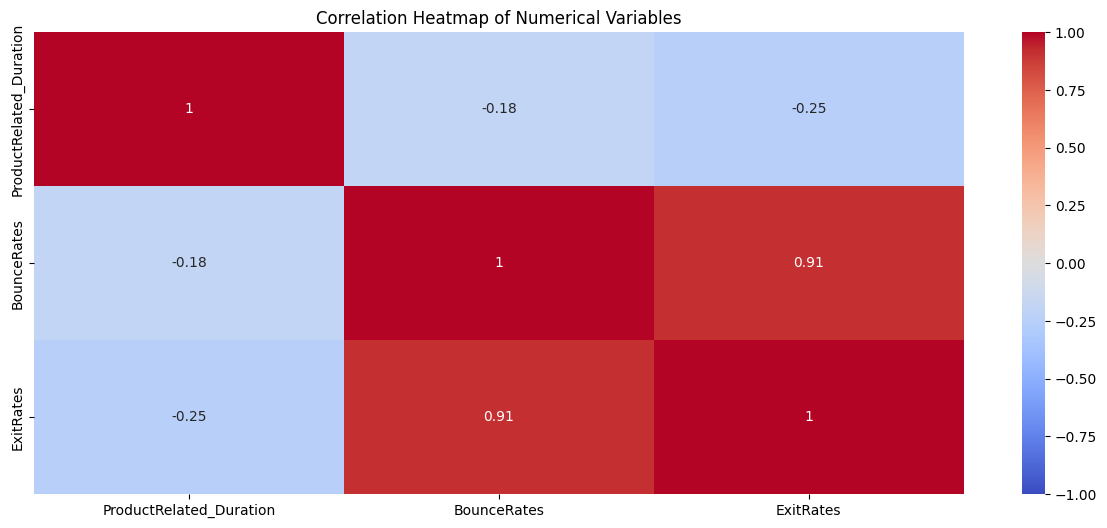

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

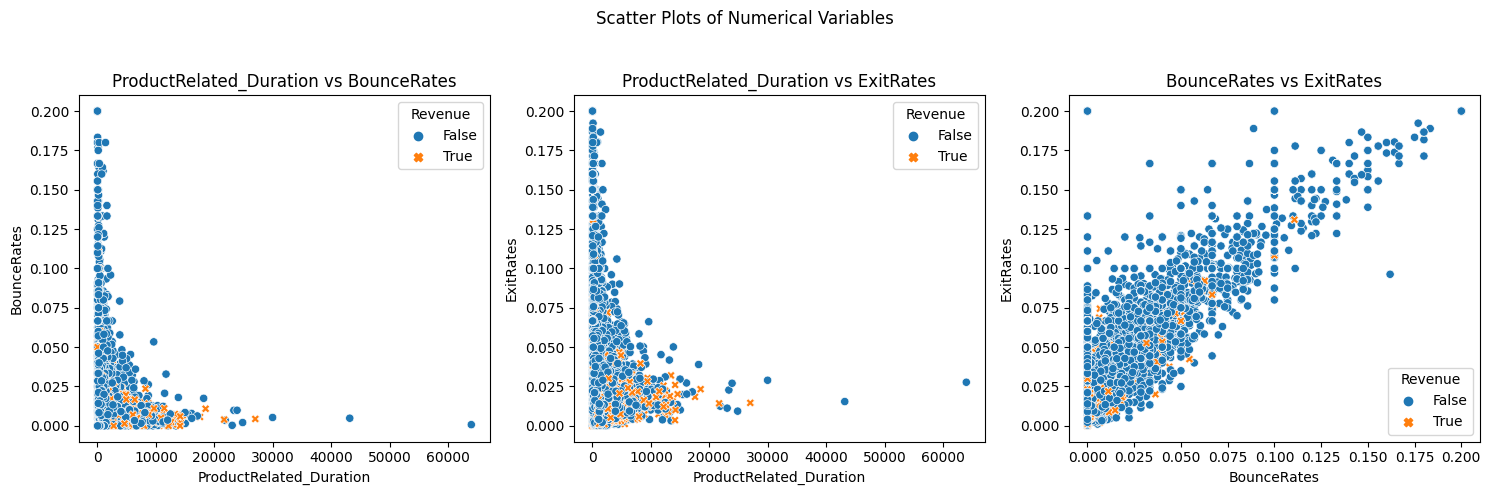

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Scatter Plots of Numerical Variables')
axes = axes.flatten()
plot_pairs = [('ProductRelated_Duration', 'BounceRates'), 
              ('ProductRelated_Duration', 'ExitRates'), 
              ('BounceRates', 'ExitRates')]
for i, (col1, col2) in enumerate(plot_pairs):
    sns.scatterplot(data=df, x=col1, y=col2, hue='Revenue', style='Revenue', ax=axes[i])
    axes[i].set_title(f'{col1} vs {col2}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

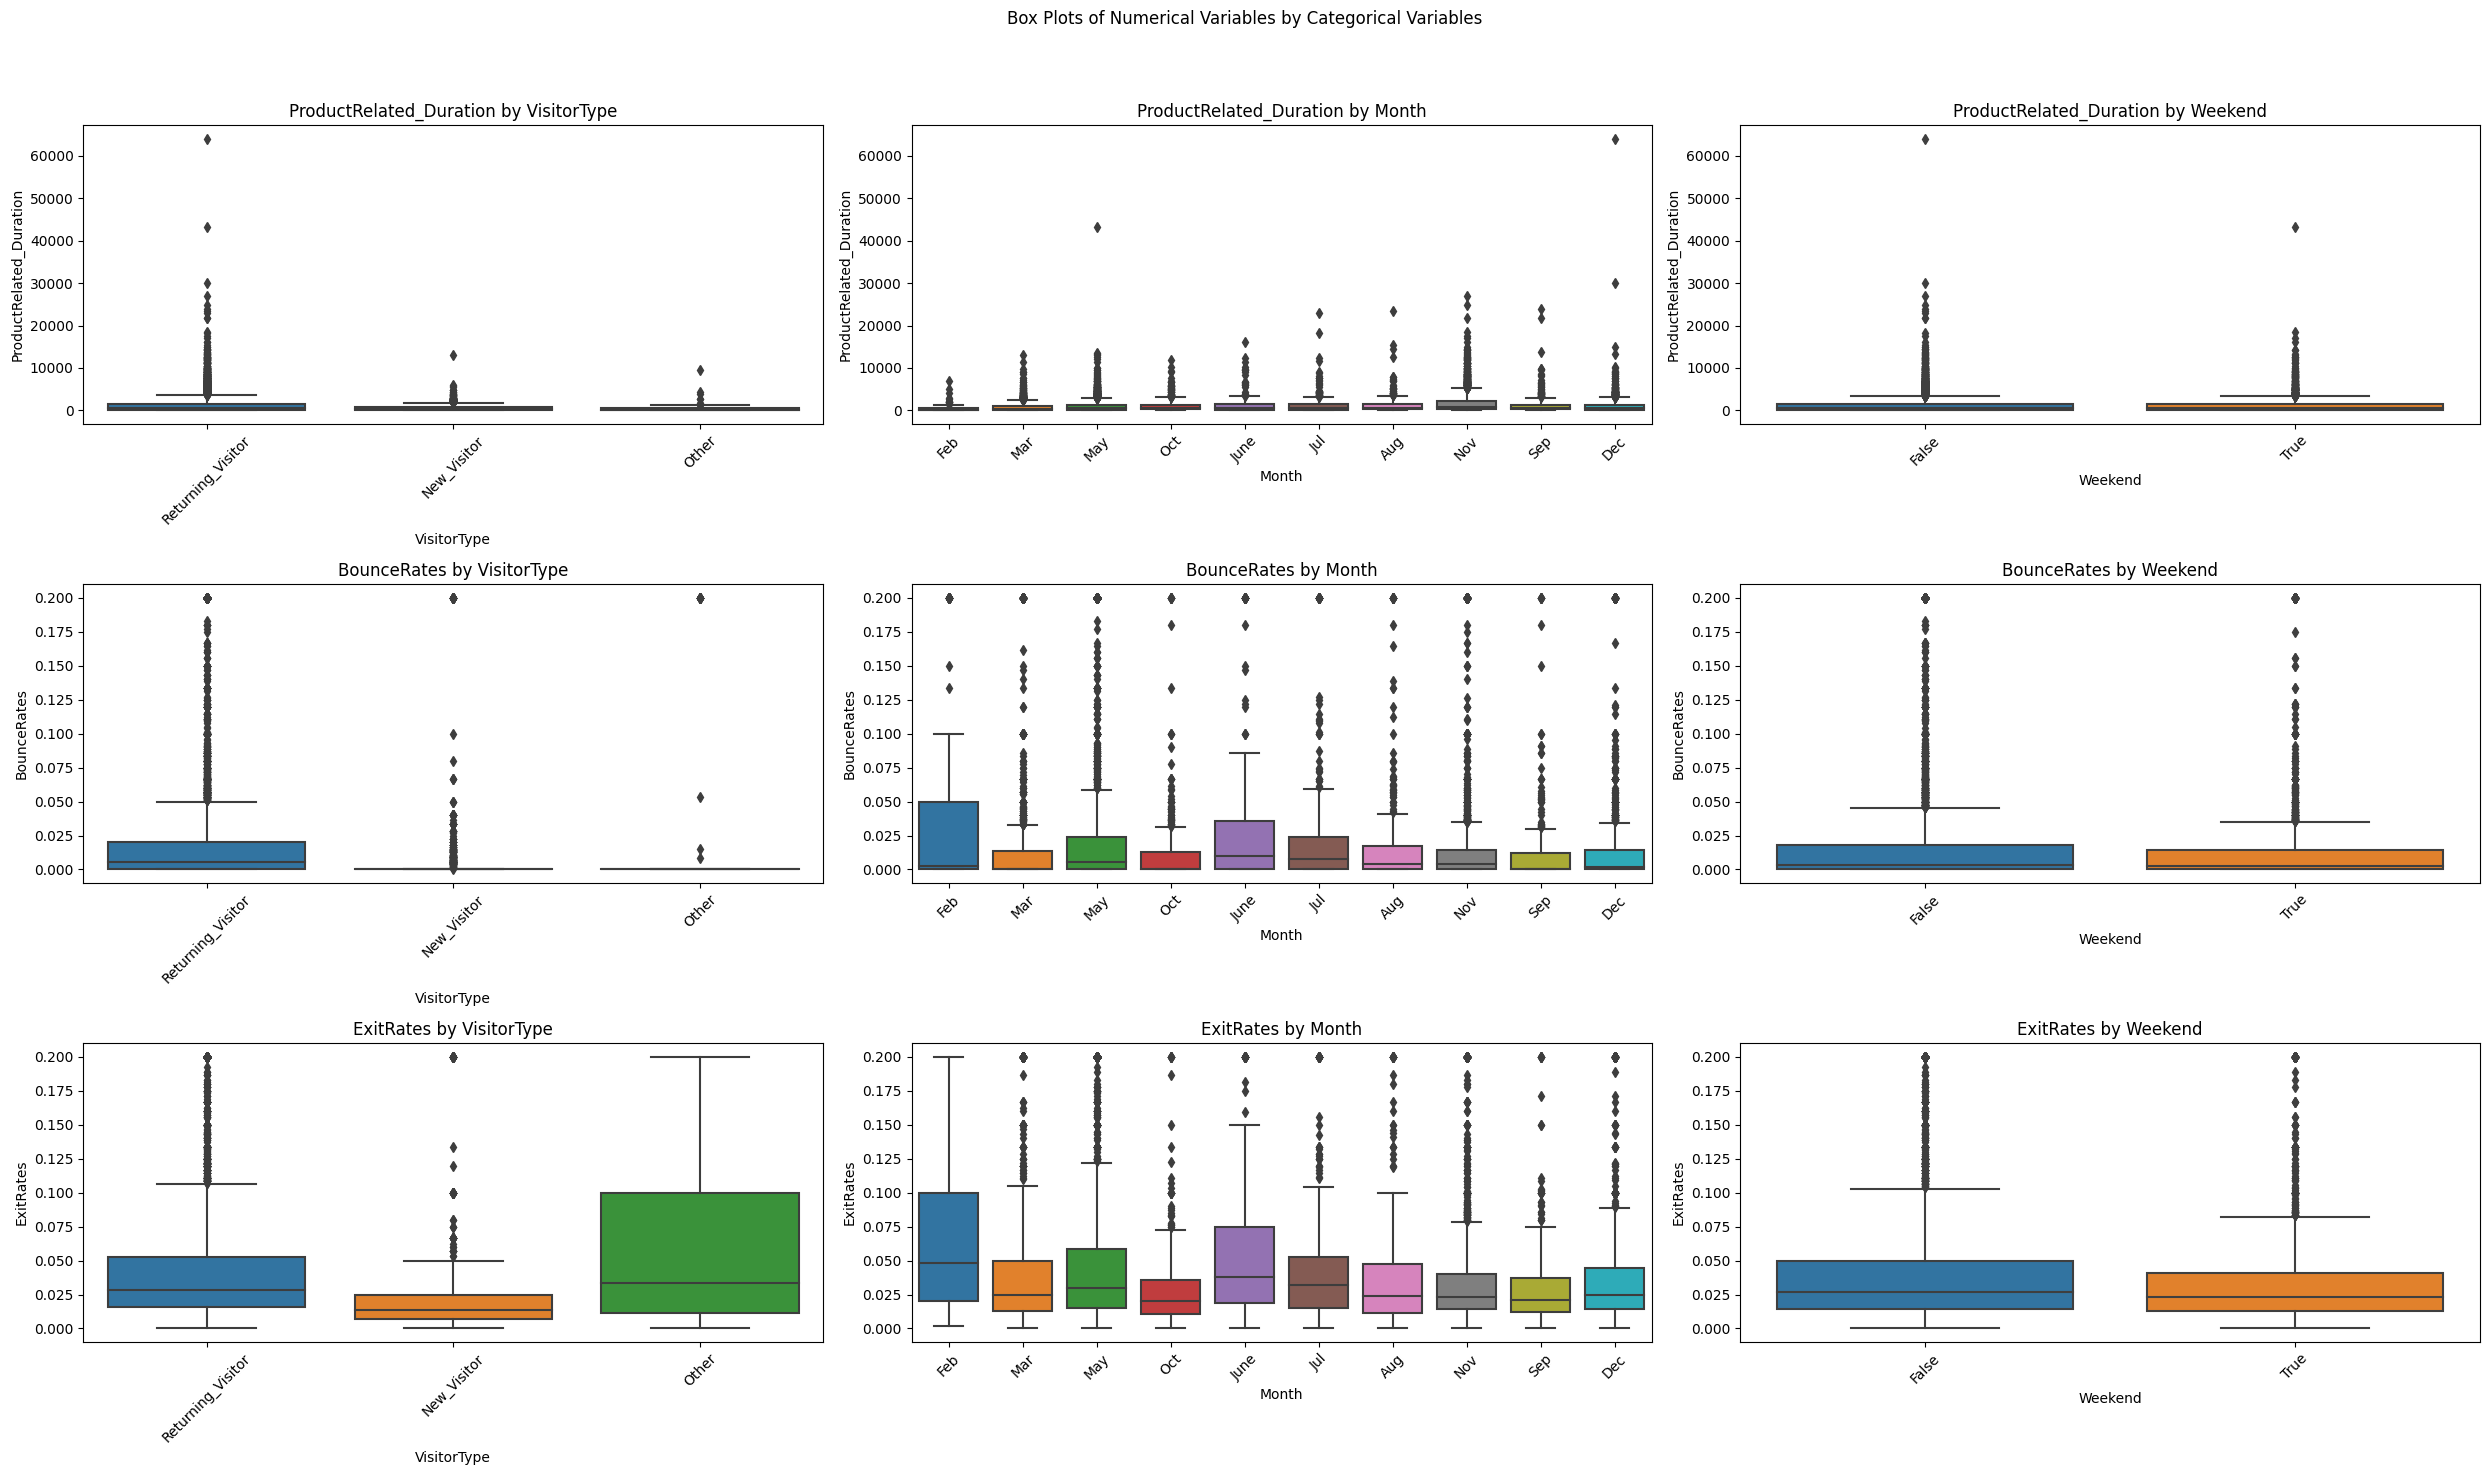

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
fig.suptitle('Box Plots of Numerical Variables by Categorical Variables')
axes = axes.flatten()
plot_combinations = [(num, cat) for num in numerical_cols for cat in ['VisitorType', 'Month', 'Weekend']]
for i, (num_col, cat_col) in enumerate(plot_combinations[:9]):  # Limit to 9 for subplot grid
    sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i])
    axes[i].set_title(f'{num_col} by {cat_col}')
    axes[i].tick_params(axis='x', rotation=45)
# Hide empty subplots (if any)
for i in range(len(plot_combinations[:9]), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

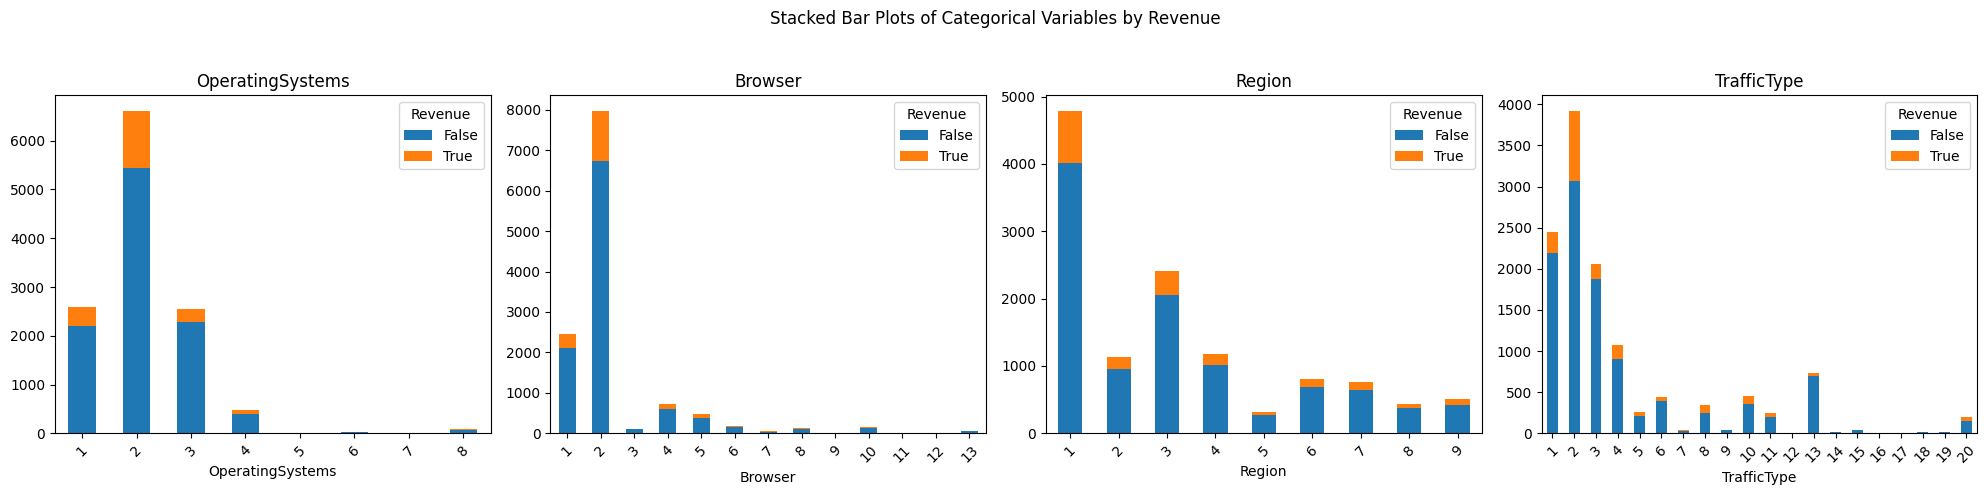

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Stacked Bar Plots of Categorical Variables by Revenue')
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    pd.crosstab(df[col], df['Revenue']).plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

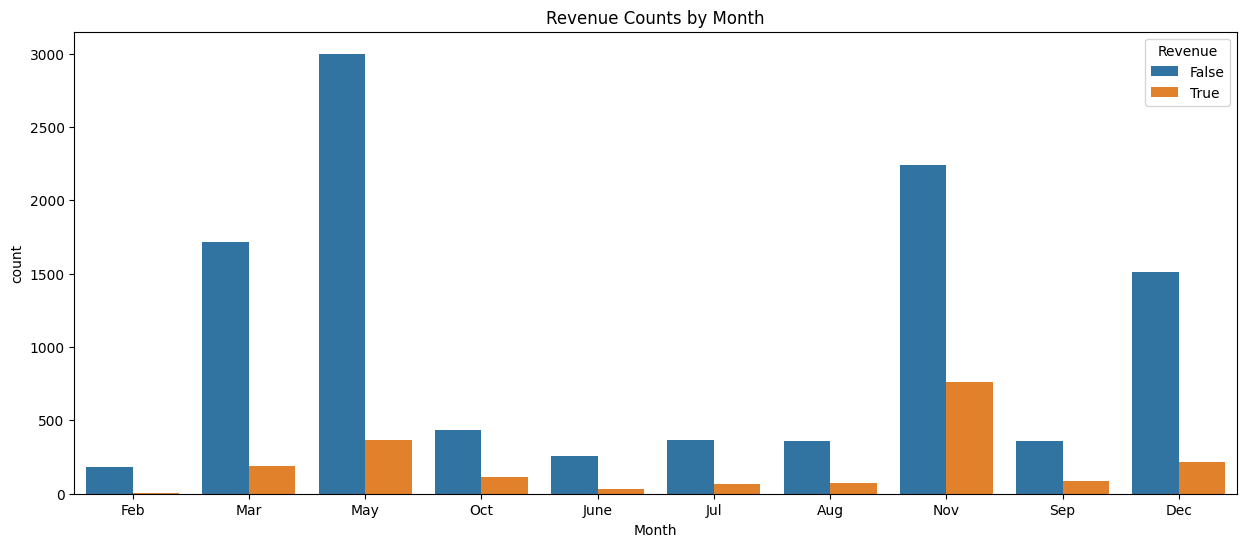

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax)
ax.set_title('Revenue Counts by Month')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

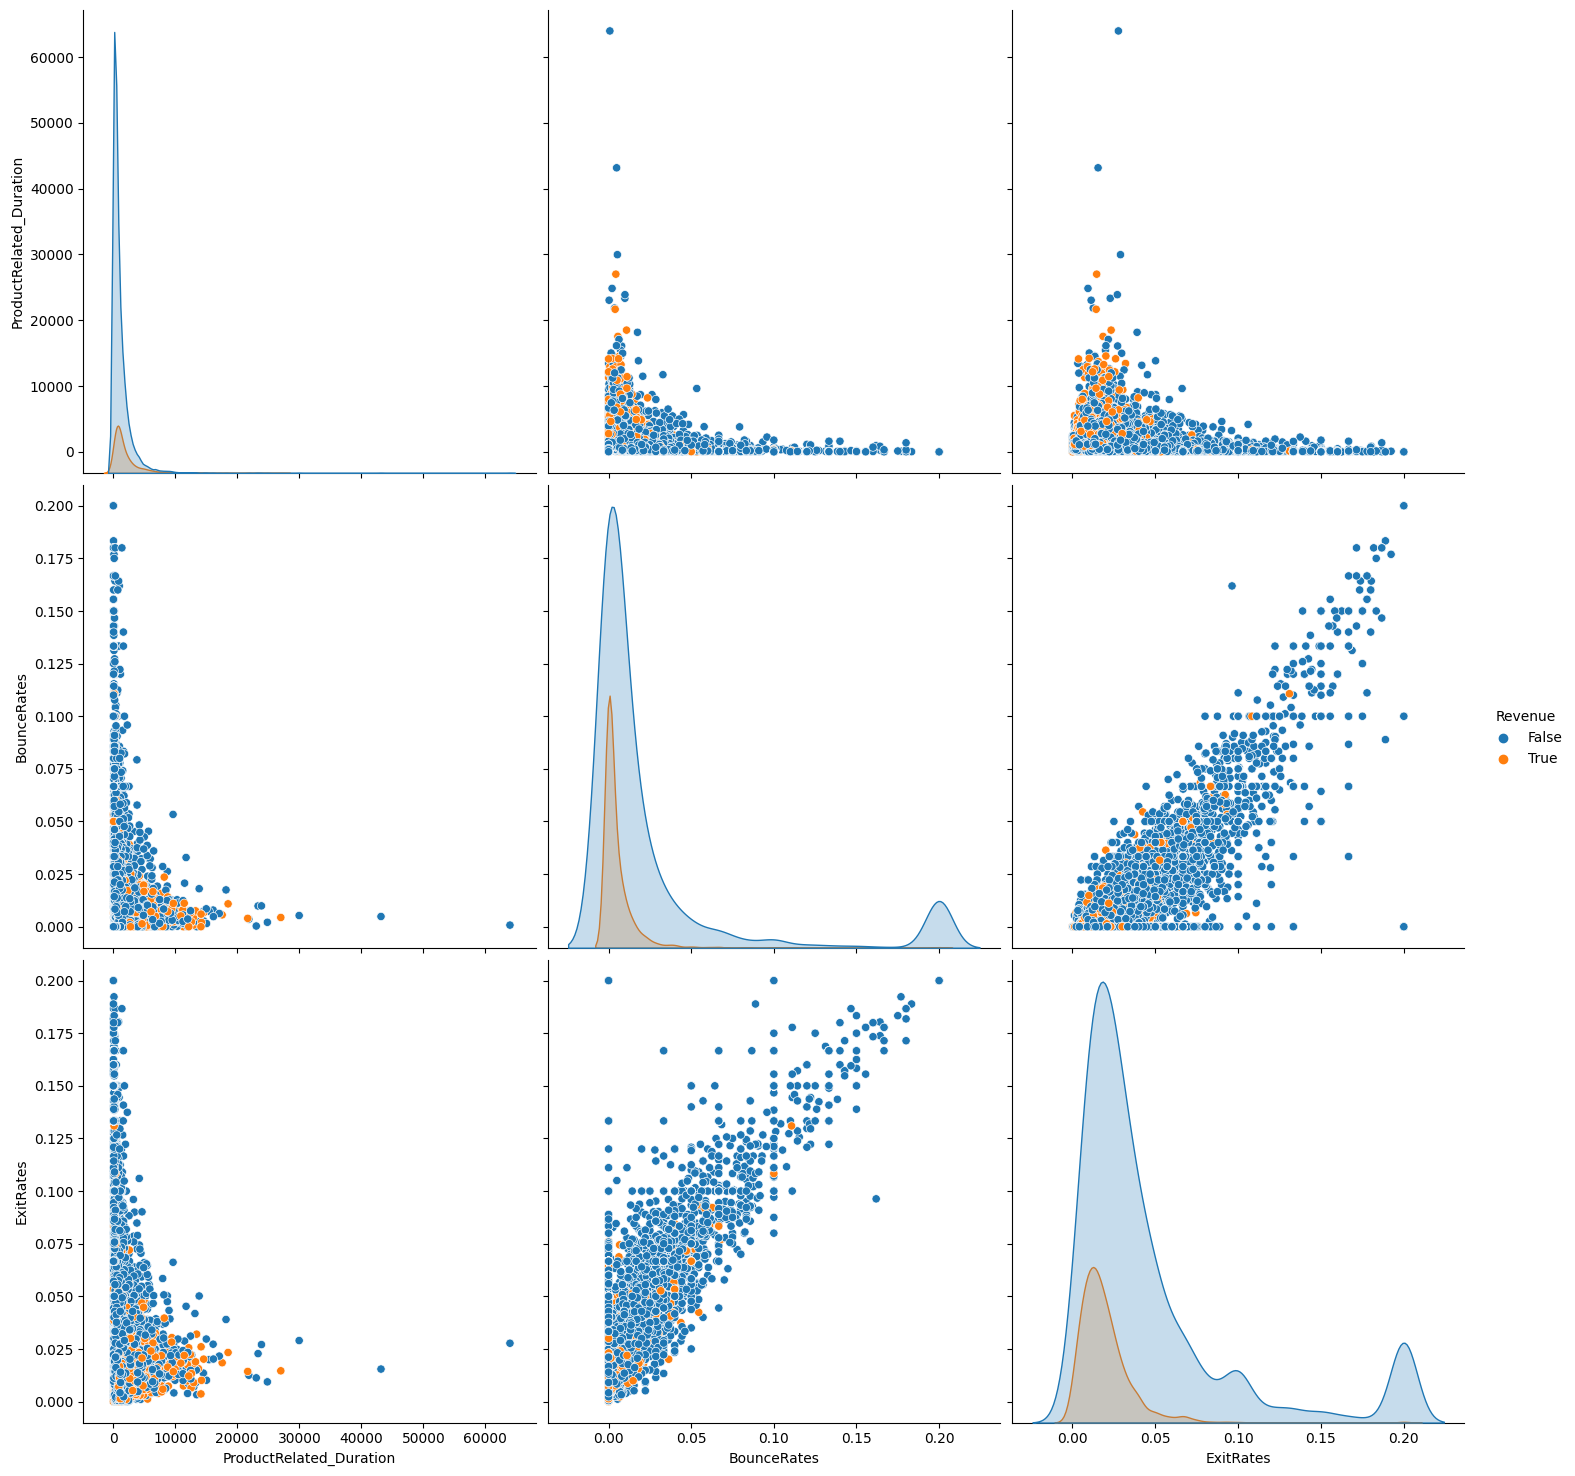

In [16]:
sns.pairplot(df, vars=['ProductRelated_Duration', 'BounceRates', 'ExitRates'], 
             hue='Revenue', diag_kind='kde',height=5)
plt.show()

In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
from sklearn.preprocessing import LabelEncoder

str_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Columns to be encoded:", str_cols.tolist())

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in str_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

Columns to be encoded: ['Month', 'VisitorType', 'Weekend', 'Revenue']
Encoded 'Month': {'Aug': 0, 'Dec': 1, 'Feb': 2, 'Jul': 3, 'June': 4, 'Mar': 5, 'May': 6, 'Nov': 7, 'Oct': 8, 'Sep': 9}
Encoded 'VisitorType': {'New_Visitor': 0, 'Other': 1, 'Returning_Visitor': 2}
Encoded 'Weekend': {False: 0, True: 1}
Encoded 'Revenue': {False: 0, True: 1}


In [19]:

from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop("Revenue", axis=1)
y = df["Revenue"]
selector = SelectKBest(score_func=f_classif, k=7)
X_selected_array = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())
df=df[selected_features.tolist() + ['Revenue']]

Selected Features: ['Administrative', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'VisitorType']


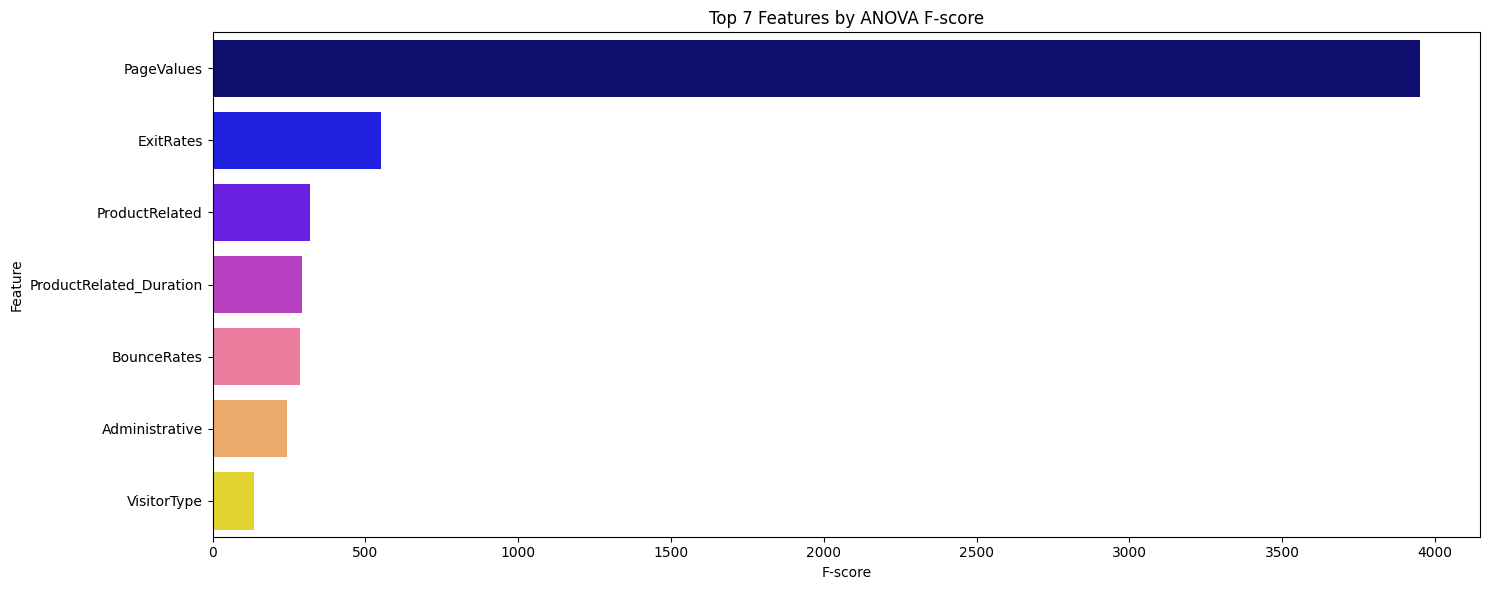

In [20]:
scores = selector.scores_[selector.get_support()]

# Create DataFrame for plotting
feature_scores = pd.DataFrame({
    'Feature': selected_features,
    'F-score': scores
}).sort_values(by='F-score', ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
sns.barplot(data=feature_scores, x='F-score', y='Feature', palette='gnuplot2')
plt.title('Top 7 Features by ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Administrative,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,VisitorType,Revenue
0,0,1,0.000000,0.20,0.20,0.0,2,0
1,0,2,64.000000,0.00,0.10,0.0,2,0
2,0,1,0.000000,0.20,0.20,0.0,2,0
3,0,2,2.666667,0.05,0.14,0.0,2,0
4,0,10,627.500000,0.02,0.05,0.0,2,0


In [22]:
from sklearn.model_selection import train_test_split
X_new = df.drop("Revenue", axis=1)
y_new = df["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42,stratify=y_new)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9864, 7)
X_test shape: (2466, 7)
y_train shape: (9864,)
y_test shape: (2466,)


In [24]:
model = Sequential([
    # Input layer
    Dense(units=256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layer 1
    Dense(units=512),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.4),
    
    # Hidden layer 2
    Dense(units=256),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.4),
    
    # Hidden layer 3
    Dense(units=128),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layer 4
    Dense(units=64),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer for binary classification
    Dense(units=2, activation='softmax')
])

optimizer = AdamW(learning_rate=0.001, weight_decay=0.004)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
I0000 00:00:1752940303.373418    1621 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311,106 (1.19 MB)

 Trainable params: 308,674 (1.18 MB)

 Non-trainable params: 2,432 (9.50 KB)

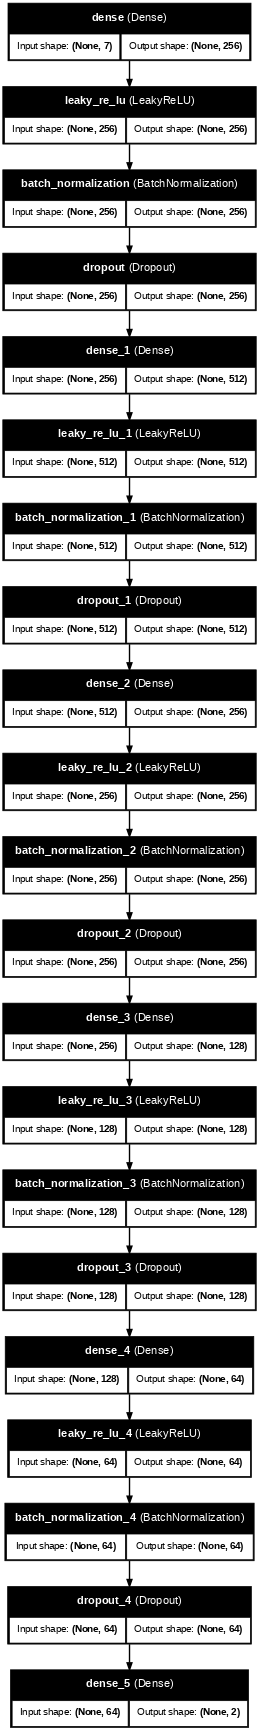

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True,dpi=50)


In [26]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)


Epoch 1/100


I0000 00:00:1752940309.952139    1673 service.cc:148] XLA service 0x78a098006730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752940309.952175    1673 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752940310.401120    1673 cuda_dnn.cc:529] Loaded cuDNN version 90300


 57/309 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5979 - loss: 0.8311

I0000 00:00:1752940313.696546    1673 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


309/309 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.7129 - loss: 0.6223 - val_accuracy: 0.8682 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8632 - loss: 0.3599 - val_accuracy: 0.8828 - val_loss: 0.3195 - learning_rate: 0.0010
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3283 - val_accuracy: 0.8759 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.3067 - val_accuracy: 0.8779 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.3071 - val_accuracy: 0.8812 - val_loss: 0.3031 - learning_rate: 0.0010
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.3077 - val_accuracy: 0.8816 - val_loss: 0.3252 - learning_rate: 0.0010
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.2939 - val

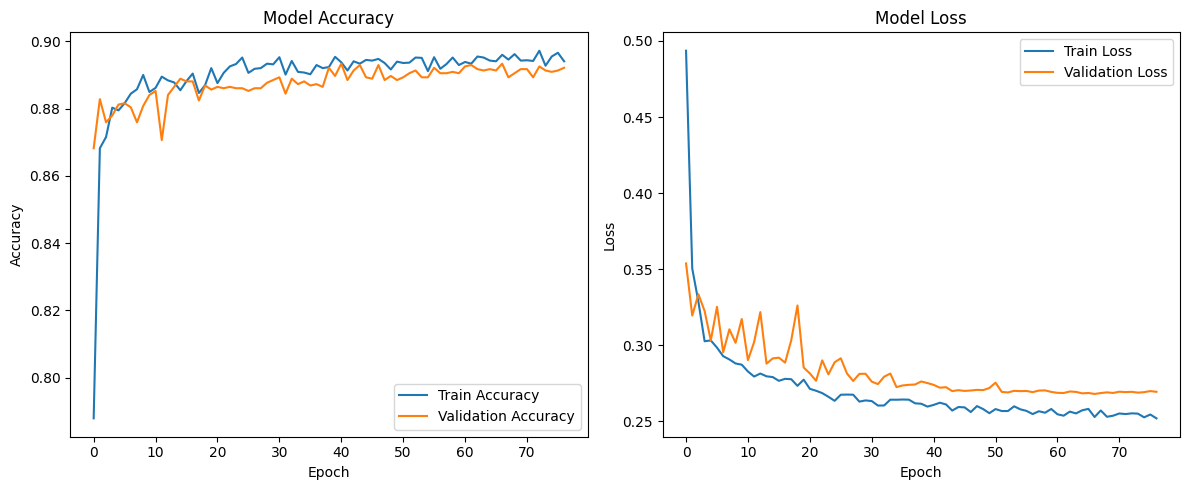

In [27]:
# Plot training history using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss : {test_loss:.4f}")

Test Accuracy: 0.8933
Test Loss : 0.2679


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


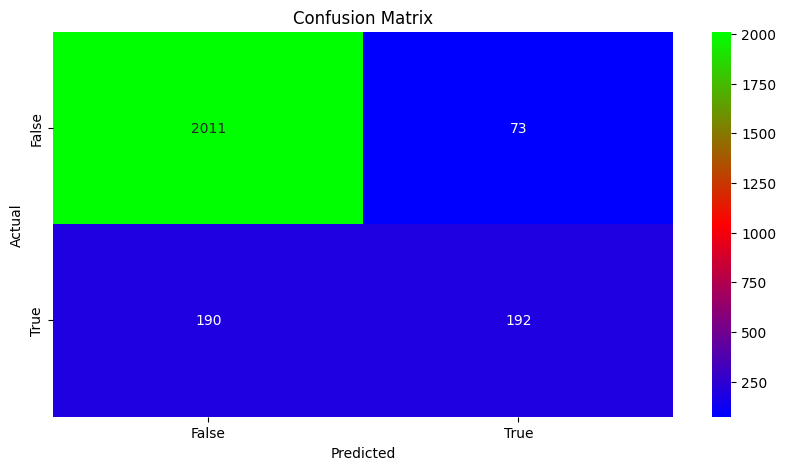

In [29]:
label_name=["False","True"]
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    average_precision_score,
    matthews_corrcoef,
    cohen_kappa_score,
    balanced_accuracy_score,
    log_loss,
    hinge_loss,
    jaccard_score,
    multilabel_confusion_matrix
)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Label names
label_names = ["False", "True"]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='brg', xticklabels=label_names, yticklabels=label_names, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))


Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2084
        True       0.72      0.50      0.59       382

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.77      2466
weighted avg       0.88      0.89      0.89      2466



78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


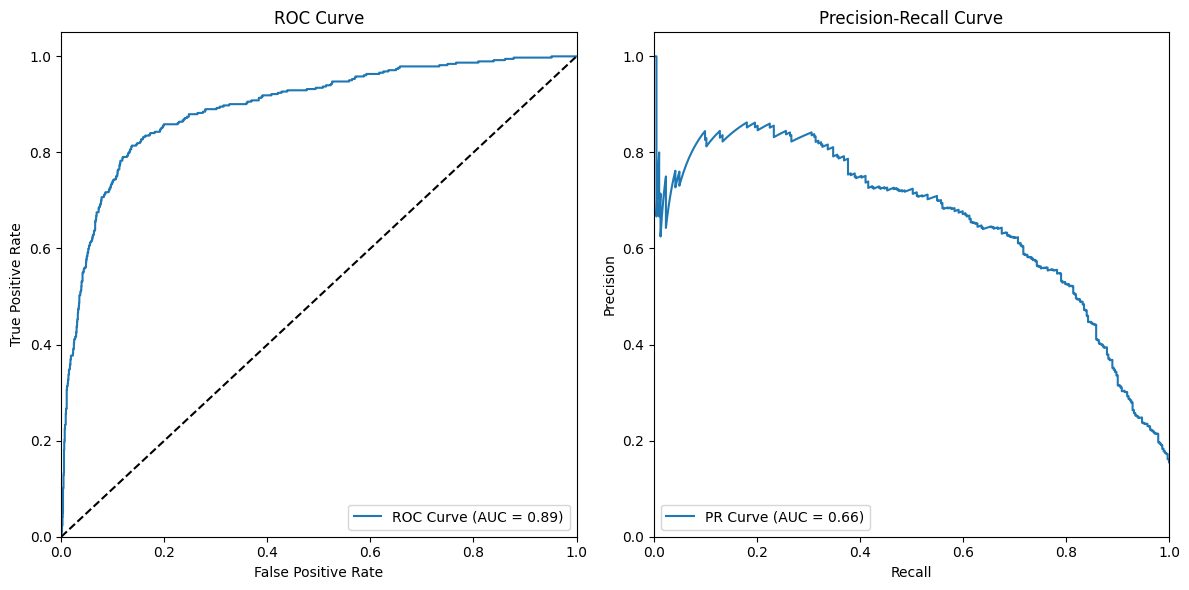

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Ensure y_pred_prob is defined:
y_pred_prob = model.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc='lower right')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
pr_auc = auc(recall, precision)
ax2.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='lower left')

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import numpy as np

custom_data = {
    'Administrative': [1],
    'ProductRelated': [5],
    'ProductRelated_Duration': [150.0],
    'BounceRates': [0.03],
    'ExitRates': [0.04],
    'PageValues': [12.5],
    'VisitorType': [2]
}

def predict_revenue(data_dict):
    df = pd.DataFrame(data_dict)
    preds = model.predict(df)
    class_num = int(np.argmax(preds, axis=1)[0])
    class_bool = bool(class_num)  # Convert 0/1 → False/True
    prob = float(preds[0][class_num])
    return {
        "Predicted Class": class_bool,
        "Probability": round(prob, 3)
    }

result = predict_revenue(custom_data)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
{'Predicted Class': True, 'Probability': 0.703}


In [33]:
model.save("my_model.keras")


In [34]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb